<a href="https://colab.research.google.com/github/MigueLucena/Determinacion-Tipos-de-Estrellas/blob/main/Practica2NT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PABLO PÉREZ GARCÍA (100472243) MIGUEL LUCENA BELMONTE (100472277)**

**EJERCICIO 1: PROGRAMACIÓN DE K-MEANS Y COMPARACIÓN CON LA IMPLEMENTACIÓN DE SKLEARN**

*Usando el scaler StandardScaler:*

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicar codificación one-hot a las columnas no numéricas
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

# Ejemplo de cómo utilizar la función
data = load_data("stars_data.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

def kmeans_programada(data, n_clusters, max_iters=300):
  #Se inicializan los centroides aleatoriamente
  centroids = data[np.random.choice(data.shape[0], n_clusters, replace = False)]

  for _ in range(max_iters):
        # Asignamos cada punto al centroide más cercano
        labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

        # Actualizamos los centroides como la media de los puntos asignados a ellos
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Si los centroides no cambian, salimos del bucle
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

        return centroids, labels


#Especificamos el número de clusters con el que se va a trabajar
n_clusters = 3

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



Resultados de K-Means personalizado:
Centroides: [[ 0.15057648  1.39316673  1.73728142 -1.28074134  0.27083333  0.10416667
   0.04166667  0.          0.54166667  0.04166667  0.          0.
   0.          0.          0.04166667  0.125       0.          0.02083333
   0.04166667  0.52083333  0.25      ]
 [-0.66041031 -0.54045331 -0.4525746   0.84627963  0.02970297  0.
   0.          0.          0.85148515  0.03960396  0.04950495  0.00990099
   0.          0.01980198  0.          0.02970297  0.0990099   0.
   0.01980198  0.85148515  0.        ]
 [ 0.65355791 -0.13501339 -0.41406015 -0.26372152  0.43956044  0.3956044
   0.          0.01098901  0.          0.06593407  0.07692308  0.
   0.01098901  0.          0.18681319  0.40659341  0.07692308  0.
   0.02197802  0.          0.30769231]]
Etiquetas: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 0 1 1 0 0 1 1 1 2 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 1 1 1 2 2 2 2 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


*Sin usar ningún scaler:*

In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color


    # Detectar columnas no numéricas y aplicar codificación one-hot
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    if len(non_numeric_columns) > 0:
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])

        # Eliminar las columnas originales no numéricas
        data = data.drop(non_numeric_columns, axis=1)

        # Añadir los datos codificados al DataFrame original
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))
        data = pd.concat([data, encoded_columns], axis=1)

    return data.values

data = load_data("stars_data.csv")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:

# Medimos el tiempo de ejecución y comparar con la implementación de scikit-learn
start_time_custom = time.time()
centroids_custom, labels_custom = kmeans_programada(data, n_clusters)
end_time_custom = time.time()
custom_time = end_time_custom - start_time_custom

start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=n_clusters)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
sklearn_time = end_time_sklearn - start_time_sklearn

# Calculamos el coeficiente de silueta para ambas implementaciones
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print("Resultados de K-Means personalizado:")
print("Centroides:", centroids_custom)
print("Etiquetas:", labels_custom)
print("Coeficiente de silueta:", silhouette_custom)
print("Tiempo de ejecución:", custom_time)

print("\nResultados de K-Means en scikit-learn:")
print("Centroides:", kmeans_sklearn.cluster_centers_)
print("Etiquetas:", labels_sklearn)
print("Coeficiente de silueta:", silhouette_sklearn)
print("Tiempo de ejecución:", sklearn_time)



Resultados de K-Means personalizado:
Centroides: [[ 2.91770213e+03  1.80823404e-03  1.67180851e-01  1.58814043e+01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [ 1.48751163e+04  2.97760593e+05  6.60095430e+02 -7.76240698e+00
   5.00000000e-01  8.13953488e-02  2.32558140e-02  0.00000000e+00
   3.72093023e-01  2.32558140e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.32558140e-02  1.16279070e-01
   0.00000000e+00  1.16279070e-02  2.32558140e-02  3.60465116e-01
   4.65116279e-01]
 [ 1.03084019e+04  1.10089446e+03  1.32526196e+00  9.09267290e+00
   1.21495327e-01  3.17757009e-01  0.00000000e+00  9.34579439e-03
   3.08411215e-01  9.34579439e-02  1.12149533e-01  9.34579439e-03
   9.34579439e-03  1.86915888e-02  1.58878505e-01  3.36

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**EJERCICIO 2: CODIFICACIÓN DE ONE-HOT ENCODING Y CODIFICACIÓN COMO VARIABLE ORDINAL**

Resultados del k-means de sklearn con one-hot encoding:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 2, Silhouette: 0.45830234995929164, Time: 0.2743816375732422
Clusters: 3, Silhouette: 0.5580222683260437, Time: 0.02201104164123535
Clusters: 4, Silhouette: 0.5957655020935702, Time: 0.027506589889526367
Clusters: 5, Silhouette: 0.6568655178946107, Time: 0.023802757263183594
Clusters: 6, Silhouette: 0.6617211283902419, Time: 0.03776264190673828
Clusters: 7, Silhouette: 0.648377972481248, Time: 0.03191256523132324


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Clusters: 8, Silhouette: 0.6419845051092394, Time: 0.05032968521118164
Clusters: 9, Silhouette: 0.5974679860867323, Time: 0.03978776931762695


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 10, Silhouette: 0.6146721470016454, Time: 0.1922469139099121


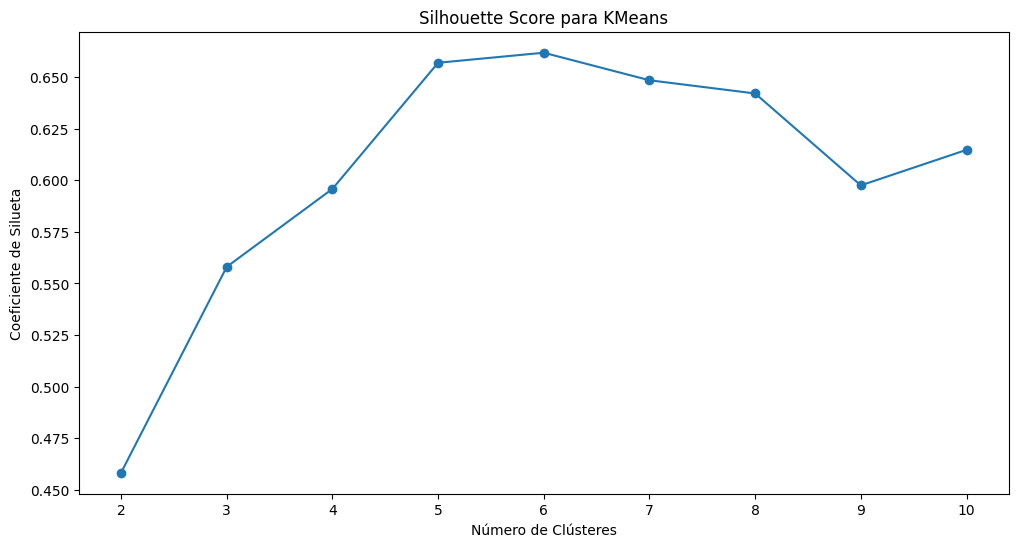

Número óptimo de clústeres según el coeficiente de silueta: 6

Resultados de K-Means usando el número óptimo de clústeres:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 4 4 1 4 1 4 4 4 2 1 1 4 4 4 4
 4 4 4 0 0 0 0 0 0 0 0 0 1 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 4 4 1 1 1 1 1 4 1 4 4 4 4 1 1 0 4 1 2 1 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 4
 4 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3 5 3 3 2 5 1 5 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 4 2 2
 2 2 2 2 2 2 2 2 5 2 2 5 5 2 2 5 5 2]
Coeficiente de silueta: 0.6630766985448968


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Supongamos que tienes los datos en la variable 'data'
# Define el número máximo de clústeres que quieres probar
max_clusters = 10

silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, max_clusters + 1)

for n_clusters in n_clusters_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(data)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

# Graficar el coeficiente de silueta en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.show()

# Encontrar el número óptimo de clústeres según el coeficiente de silueta
optimal_clusters = n_clusters_range[np.argmax(silhouette_values)]
print(f"Número óptimo de clústeres según el coeficiente de silueta: {optimal_clusters}")

# Ejecutar KMeans con el número óptimo de clústeres y mostrar resultados
kmeans_optimal = KMeans(n_clusters=optimal_clusters)
labels_optimal = kmeans_optimal.fit_predict(data)
silhouette_optimal = silhouette_score(data, labels_optimal)
print("\nResultados de K-Means usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)


Resultados del k-means de sklearn codificando como variable ordinal:



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Clusters: 2, Silhouette: 0.45830234995929164, Time: 0.010673999786376953
Clusters: 3, Silhouette: 0.5580222683260437, Time: 0.02651691436767578
Clusters: 4, Silhouette: 0.5957655020935702, Time: 0.019399166107177734
Clusters: 5, Silhouette: 0.6568655178946107, Time: 0.030824899673461914
Clusters: 6, Silhouette: 0.6617211283902419, Time: 0.034760475158691406
Clusters: 7, Silhouette: 0.6542370553464054, Time: 0.03410506248474121


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 8, Silhouette: 0.6615662062448462, Time: 0.07744455337524414
Clusters: 9, Silhouette: 0.6472881869142619, Time: 0.051241397857666016
Clusters: 10, Silhouette: 0.6060685706919238, Time: 0.057541847229003906


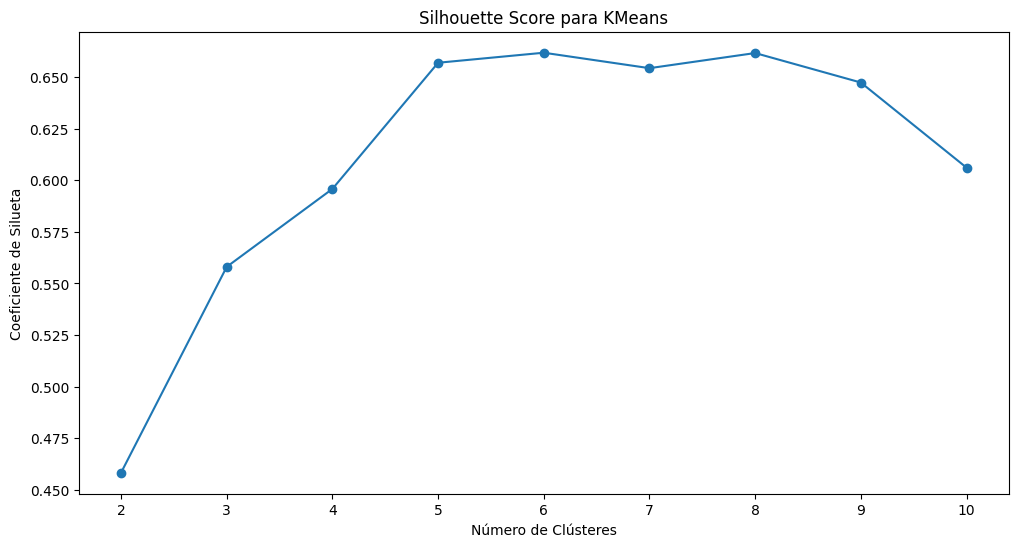

Número óptimo de clústeres según el coeficiente de silueta: 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Resultados de K-Means usando el número óptimo de clústeres:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 4 4 1 4 1 4 4 4 3 1 1 4 4 4 4
 4 4 4 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 4 4 4 1 1 1 1 1 4 1 4 4 4 4 1 1 0 4 1 3 1 3 3 3 3 3 3 3 3 3 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 4
 4 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 2 2 2 5 2 2 3 5 1 5 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 4 3 3
 3 3 3 3 3 3 3 3 5 3 3 5 5 3 3 5 5 3]
Coeficiente de silueta: 0.6617211283902419


In [29]:
from sklearn.preprocessing import OrdinalEncoder

def load_data(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Codificar las columnas no numéricas como variables ordinales
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    return data.values

data = load_data("stars_data.csv")



start_time_ordinal = time.time()
kmeans_ordinal = KMeans(n_clusters=n_clusters)
labels_ordinal = kmeans_ordinal.fit_predict(data)
end_time_ordinal = time.time()
ordinal_time = end_time_ordinal - start_time_ordinal

silhouette_ordinal = silhouette_score(data, labels_ordinal)

import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Supongamos que tienes los datos en la variable 'data'
# Define el número máximo de clústeres que quieres probar
max_clusters = 10

# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, max_clusters + 1)

for n_clusters in n_clusters_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(data)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

# Graficar el coeficiente de silueta en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.show()

# Encontrar el número óptimo de clústeres según el coeficiente de silueta
optimal_clusters = n_clusters_range[np.argmax(silhouette_values)]
print(f"Número óptimo de clústeres según el coeficiente de silueta: {optimal_clusters}")

# Ejecutar KMeans con el número óptimo de clústeres y mostrar resultados
kmeans_optimal = KMeans(n_clusters=optimal_clusters)
labels_optimal = kmeans_optimal.fit_predict(data)
silhouette_optimal = silhouette_score(data, labels_optimal)
print("\nResultados de K-Means usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)


Como se puede ver, el tiempo de ejecución usando el cifrado con OrdinalEncoder es menor que si usamos One-Hot Encoding, sin embargo, al realizar el cifrado de las variables categóricas con One-Hot Encoding se obtiene mayor coeficiente de silueta, lo que nos indica que es más preciso.

**EJERCICIO 3: APLICACIÓN DE ALGORITMOS DE CLUSTERING**

*Carga de datos aplicando One-Hot Encoding:*



In [12]:
from sklearn.decomposition import PCA

def load_data_onehot_pca(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
}

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color



    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Aplicar codificación one-hot a las columnas no numéricas
        encoder = OneHotEncoder(sparse=False)
        non_numeric_data = encoder.fit_transform(data[non_numeric_columns])
        encoded_columns = pd.DataFrame(non_numeric_data, columns=encoder.get_feature_names_out(non_numeric_columns))

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    return data_pca

data_onehot_pca = load_data_onehot_pca("stars_data.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


*Carga de datos usando OrdinalEncoder:*

In [13]:
def load_data_ordinal_pca(file_path):
    data = pd.read_csv(file_path)

    mapping = {
    'Red' : ['Red'],
    'Orange-Red': ['Orange-Red'],
    'Orange': ['Orange'],
    'Yellow-Orange': ['Pale yellow orange'],
    'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
    'White': ['White', 'Whitish', 'white'],
    'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
    'Blue': ['Blue'],
    }

    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color


    # Detectar columnas no numéricas y numéricas
    non_numeric_columns = data.select_dtypes(include=['object']).columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns

    if len(non_numeric_columns) > 0:
        # Codificar las columnas no numéricas como variables ordinales
        encoder = OrdinalEncoder()
        ordinal_encoded_data = encoder.fit_transform(data[non_numeric_columns])
        ordinal_encoded_columns = pd.DataFrame(ordinal_encoded_data, columns=non_numeric_columns)

    if len(numeric_columns) > 0:
        # Escalar las columnas numéricas
        scaler = StandardScaler()
        scaled_numeric_data = scaler.fit_transform(data[numeric_columns])
        scaled_numeric_columns = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)

    # Combinar los datos codificados y escalados de nuevo en un solo DataFrame
    if len(non_numeric_columns) > 0 and len(numeric_columns) > 0:
        data = pd.concat([scaled_numeric_columns, ordinal_encoded_columns], axis=1)
    elif len(non_numeric_columns) > 0:
        data = ordinal_encoded_columns
    elif len(numeric_columns) > 0:
        data = scaled_numeric_columns

    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)

    return data_pca

data_ordinal_pca = load_data_ordinal_pca("stars_data.csv")

*Aplicando Hierarchical Clustering:*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Clusters: 2, Silhouette: 0.5112431491741848, Time: 0.004181861877441406
Clusters: 3, Silhouette: 0.5388572529098407, Time: 0.0035343170166015625
Clusters: 4, Silhouette: 0.5710533272099182, Time: 0.003462553024291992
Clusters: 5, Silhouette: 0.5830699996044733, Time: 0.0035059452056884766
Clusters: 6, Silhouette: 0.6001518371341007, Time: 0.003660917282104492
Clusters: 7, Silhouette: 0.5731658465383395, Time: 0.003199338912963867
Clusters: 8, Silhouette: 0.5751520498753363, Time: 0.0037300586700439453
Clusters: 9, Silhouette: 0.5765173160723094, Time: 0.0035250186920166016
Clusters: 10, Silhouette: 0.5959350438474191, Time: 0.003641366958618164


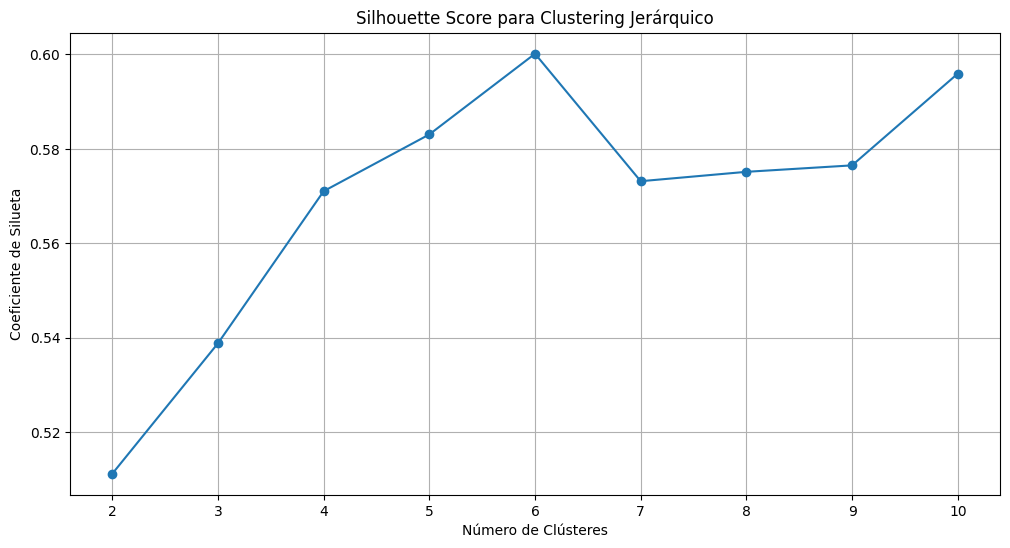

Número óptimo de clústeres según el método de Silhouette: 6

Resultados de Clustering Jerárquico usando el número óptimo de clústeres:
Etiquetas: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 5 5 5 5 5 5 5 5 5 1 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 4
 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 4 4 2 2 4 4 2 2 1 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
Coeficiente de silueta: 0.6001518371341007


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


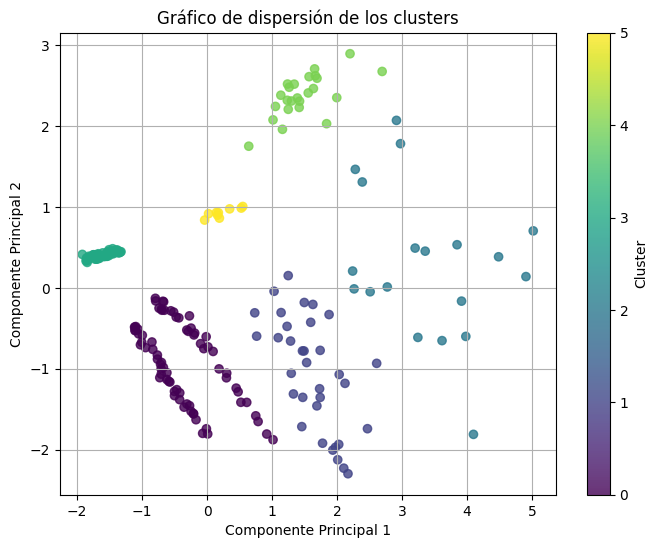

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import numpy as np

# Supongamos que 'data_onehot_pca' son tus datos, y 'labels_onehot_pca' son las etiquetas de clustering

# PCA para reducción de dimensionalidad (asumiendo que data_onehot_pca ya está en un formato apto)
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_onehot_pca)

# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    start_time = time.time()
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(data_onehot_pca)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data_onehot_pca, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

# Graficar el coeficiente de silueta en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para Clustering Jerárquico')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontrar el número óptimo de clústeres según el método del codo
optimal_index = np.argmax(silhouette_values)
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el método de Silhouette: {optimal_clusters}")

# Ejecutar clustering jerárquico con el número óptimo de clústeres y mostrar resultados
clustering_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
labels_optimal = clustering_optimal.fit_predict(data_onehot_pca)
silhouette_optimal = silhouette_score(data_onehot_pca, labels_optimal)
print("\nResultados de Clustering Jerárquico usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)

# Gráfico de dispersión con el número óptimo de clústeres
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optimal, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()



Como se puede observar, hay una clara diferenciación entre clusters, ya que hay una correcta separación ellos. Este hecho nos lleva a pensar que se han identificado correctamente unos patrones distintos entre los datos y que estos (los datos) han sido separados de forma coherente, lo que facilita también mucho el estudio de los resultados. Cabe destacar que una buena diferenciación entre clusters, como es en este caso, podría indicar una buena selección de algoritmo de clustering.

Sin embargo, con respecto a la dispersión dentro del mismo cluster, es cierto que podemos encontrar una alta separación entre los datos del mismo cluster, lo que indica una alta variabilidad. Podría significar que existen ciertos subgrupos o subpoblaciones dentro del cluster, o incluso que el cluster contenga ciertos puntos de ruido, que nos lleva a pensar que no hay una estructura concreta dentro de él. Una alta dispersión dentro del mismo cluster podría estar señalando que no estamos eligiendo un buen método de clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Clusters: 2, Silhouette: 0.579279353961045, Time: 0.010447025299072266
Clusters: 3, Silhouette: 0.718971759949374, Time: 0.0035028457641601562
Clusters: 4, Silhouette: 0.7841045991929915, Time: 0.003416299819946289
Clusters: 5, Silhouette: 0.7968932216601642, Time: 0.0035724639892578125
Clusters: 6, Silhouette: 0.7895160678250802, Time: 0.003712177276611328
Clusters: 7, Silhouette: 0.70798541112025, Time: 0.0035588741302490234
Clusters: 8, Silhouette: 0.7026811210422277, Time: 0.0036487579345703125
Clusters: 9, Silhouette: 0.6588126150197738, Time: 0.004361391067504883
Clusters: 10, Silhouette: 0.6592096385661587, Time: 0.0035865306854248047


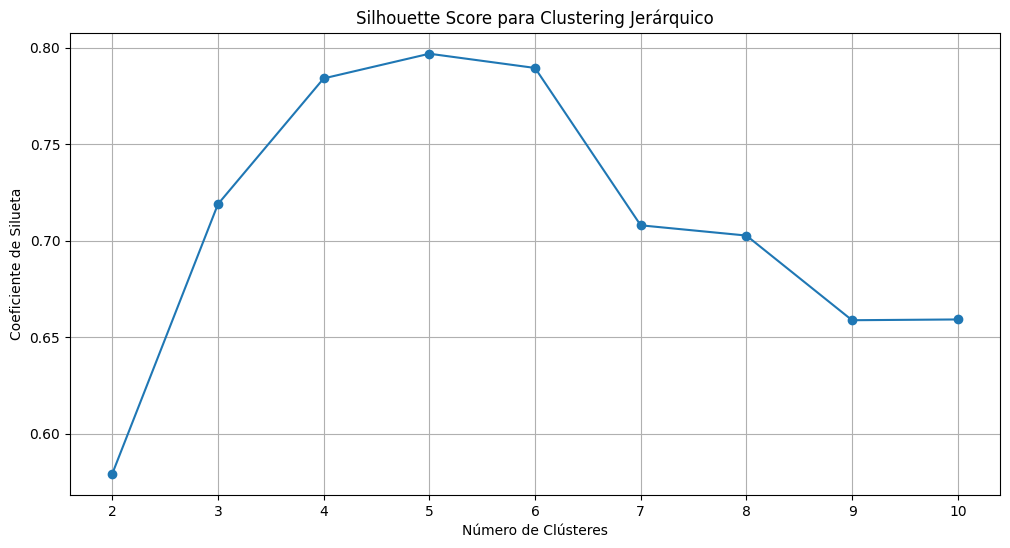

Número óptimo de clústeres según el método de Silhouette: 5

Resultados de Clustering Jerárquico usando el número óptimo de clústeres:
Etiquetas: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 3 1 3 1 3 3 3 2 1 1 3 3 3 3
 3 3 3 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 3 3 1 1 1 1 1 3 1 3 4 4 4 1 1 0 3 1 2 1 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 3
 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 0 2 1 0 0 2 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 3 2 2
 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 3 3 2]
Coeficiente de silueta: 0.7968932216601642


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


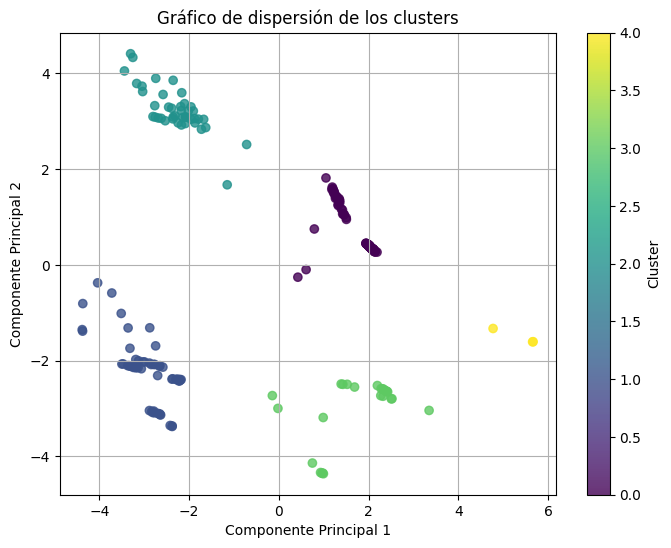

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import numpy as np

# Supongamos que 'data_ordinal_pca' son tus datos

# PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_ordinal_pca)

# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

# Rango de número de clústeres a probar
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    start_time = time.time()
    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = clustering.fit_predict(data_ordinal_pca)
    end_time = time.time()
    execution_time = end_time - start_time
    silhouette = silhouette_score(data_ordinal_pca, labels)
    silhouette_values.append(silhouette)
    execution_times.append(execution_time)
    print(f"Clusters: {n_clusters}, Silhouette: {silhouette}, Time: {execution_time}")

# Graficar el coeficiente de silueta en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, silhouette_values, marker='o')
plt.title('Silhouette Score para Clustering Jerárquico')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontrar el número óptimo de clústeres según el método del codo
optimal_index = np.argmax(silhouette_values)
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el método de Silhouette: {optimal_clusters}")

# Ejecutar clustering jerárquico con el número óptimo de clústeres y mostrar resultados
clustering_optimal = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
labels_optimal = clustering_optimal.fit_predict(data_ordinal_pca)
silhouette_optimal = silhouette_score(data_ordinal_pca, labels_optimal)
print("\nResultados de Clustering Jerárquico usando el número óptimo de clústeres:")
print("Etiquetas:", labels_optimal)
print("Coeficiente de silueta:", silhouette_optimal)

# Gráfico de dispersión con el número óptimo de clústeres
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optimal, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Lo cierto es que la separación entre clusters es bastante grande, que como decíamos anteriormente, significa que se han identificado satisfactoriamente los diferencias entre patrones y datos distintos, facilitando así el estudio. Esto indica un buen proceso de clustering con los datos tratados.

En cuanto a la separación de los puntos dentro del mismo cluster, sigue existiendo cierta dispersión en algún cluster. En concreto, en uno de ellos se pueden observar claramente la existencia de 2 subpoblaciones, lo que señala la presencia de dos patrones de datos totalmente distintos. Sin embargo, con respecto a los otros clusters representados, se observa una baja dispersión, lo que nos hace reflexionar que podría ser un buen algoritmo de clustering para trabajar con estos datos.

*Aplicando DBSCAN:*

eps: 0.1, min_samples: 2, Silhouette: 0.34698574308627606, Time: 0.0034537315368652344
eps: 0.1, min_samples: 3, Silhouette: 0.30301965715625034, Time: 0.006613254547119141
eps: 0.1, min_samples: 4, Silhouette: 0.25509153553094355, Time: 0.007157087326049805
eps: 0.1, min_samples: 5, Silhouette: 0.2583377048612985, Time: 0.002707958221435547
eps: 0.1, min_samples: 6, Silhouette: 0.22080246072389142, Time: 0.002660989761352539
eps: 0.1, min_samples: 7, Silhouette: 0.23174344327592739, Time: 0.0026154518127441406
eps: 0.1, min_samples: 8, Silhouette: 0.23174344327592739, Time: 0.002841472625732422
eps: 0.1, min_samples: 9, Silhouette: 0.36620677514327676, Time: 0.0027244091033935547
eps: 0.1, min_samples: 10, Silhouette: 0.36620677514327676, Time: 0.0024383068084716797
eps: 0.2, min_samples: 2, Silhouette: 0.46750521259742495, Time: 0.0034971237182617188
eps: 0.2, min_samples: 3, Silhouette: 0.4409652800536598, Time: 0.0026488304138183594
eps: 0.2, min_samples: 4, Silhouette: 0.408776276

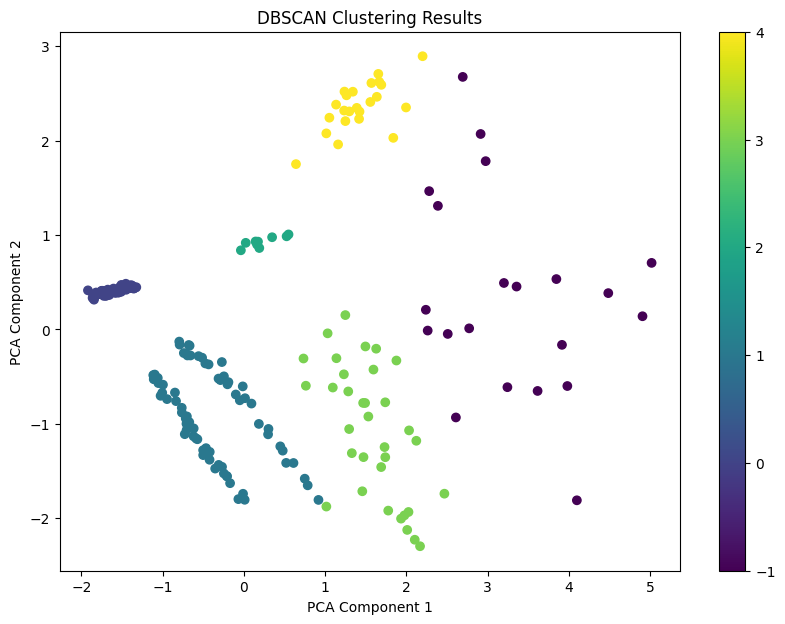

Resultados del clustering DBSCAN con parámetros óptimos:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  3  3  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  3  4  4  4 -1  4  4  4  4  4  4  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  3  3 -1  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  3  3  3  3  3  3  3  3  3
  3  3  4  4 -1 -1  4  4 -1 -1  3 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  3
  1  1  1  1  3  3  3 -1  3  3 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Coeficiente de Silueta con parámetros óptimos: 0.5986486814391402


In [24]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supongamos que 'data_onehot_pca' son tus datos

# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Rango de valores de eps a probar
eps_range = np.arange(0.1, 1.0, 0.1)

# Rango de valores de min_samples a probar
min_samples_range = range(2, 11)

# Lista para almacenar los resultados del clustering
cluster_labels = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

for eps in eps_range:
    for min_samples in min_samples_range:
        clustering = DBSCAN(eps=eps, min_samples=min_samples)
        start_time = time.time()
        labels = clustering.fit_predict(data_onehot_pca)
        end_time = time.time()
        execution_time = end_time - start_time
        silhouette = silhouette_score(data_onehot_pca, labels)
        silhouette_values.append(silhouette)
        cluster_labels.append(labels)
        execution_times.append(execution_time)
        print(f"eps: {eps}, min_samples: {min_samples}, Silhouette: {silhouette}, Time: {execution_time}")

# Encontrar el índice del mejor valor de coeficiente de silueta
optimal_index = np.argmax(silhouette_values)
optimal_eps_index = optimal_index // len(min_samples_range)
optimal_min_samples_index = optimal_index % len(min_samples_range)

optimal_eps = eps_range[optimal_eps_index]
optimal_min_samples = min_samples_range[optimal_min_samples_index]

print(f"Parámetros óptimos: eps={optimal_eps}, min_samples={optimal_min_samples}, Silhouette: {silhouette_values[optimal_index]}")

# Ejecutar DBSCAN con los parámetros óptimos y mostrar resultados
optimal_clustering = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
optimal_labels = optimal_clustering.fit_predict(data_onehot_pca)

# Graficar los resultados del clustering con los parámetros óptimos
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_onehot_pca[:, 0], data_onehot_pca[:, 1], c=optimal_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.show()

# Imprimir los resultados del clustering con los parámetros óptimos
print("Resultados del clustering DBSCAN con parámetros óptimos:")
print(optimal_labels)

# Imprimir el coeficiente de silueta con los parámetros óptimos
print("Coeficiente de Silueta con parámetros óptimos:", silhouette_values[optimal_index])



Después de llevar a cabo la representación de los datos, nos damos cuenta que entre ciertos clusters no existe una gran dispersión, lo que nos indica que quizás no se han sabido diferenciar de la mejor manera los distintos datos y patrones.

Además, dentro de los propios clusters se encuentra una gran dispersión, lo que, además de dificultar el estudio de los datos, señala que existe una alta diferenciación en los valores dentro del mismo grupo. Esto y lo mencionado anteriormente, nos lleva a la teoría de que este método de clustering no sea el más indicado.

eps: 0.1, min_samples: 2, Silhouette: 0.48795038890555237, Time: 0.003202199935913086
eps: 0.1, min_samples: 3, Silhouette: 0.38891777674590283, Time: 0.0029129981994628906
eps: 0.1, min_samples: 4, Silhouette: 0.2737445625246558, Time: 0.002713918685913086
eps: 0.1, min_samples: 5, Silhouette: 0.33878196839480407, Time: 0.0028307437896728516
eps: 0.1, min_samples: 6, Silhouette: 0.26306500573476527, Time: 0.002780914306640625
eps: 0.1, min_samples: 7, Silhouette: 0.23018016711757072, Time: 0.002877950668334961
eps: 0.1, min_samples: 8, Silhouette: 0.23018016711757072, Time: 0.0029380321502685547
eps: 0.1, min_samples: 9, Silhouette: 0.17031874887570977, Time: 0.0027587413787841797
eps: 0.1, min_samples: 10, Silhouette: 0.32739466857316074, Time: 0.002794027328491211
eps: 0.2, min_samples: 2, Silhouette: 0.622867973678431, Time: 0.0029609203338623047
eps: 0.2, min_samples: 3, Silhouette: 0.5858985440150498, Time: 0.003032684326171875
eps: 0.2, min_samples: 4, Silhouette: 0.580725791909

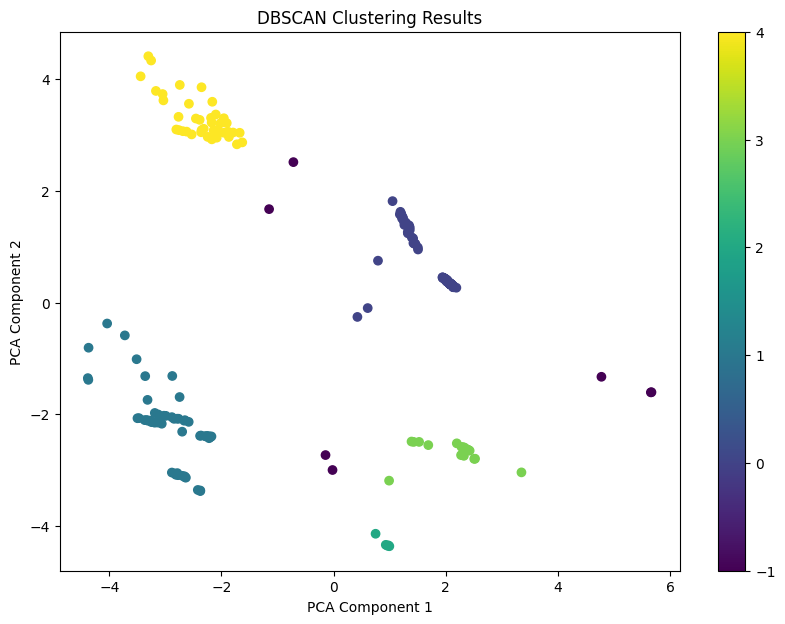

Resultados del clustering DBSCAN con parámetros óptimos:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  3  2
  1  3  1  3  3  3  4  1  1  3  3  2  3  3  3  3  0  0  0  0  0  0  0  0
  0  1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  3  3  2  1  1  1  1  1  3  1  3 -1 -1 -1  1  1
  0  3  1  4  1  4  4  4  4  4  4  4  4  4  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  3  2  1  1  1  1  1  1  1  1  1  1  4  4  4  4  4  4  4  4  4
  4  4  0  0 -1  1  0  0  4  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  4  4
  1  1  1  3  4  4  4  4  4  4  4  4  4  4  1  4  4  1  1  4  4 -1 -1  4]
Coeficiente de Silueta con parámetros óptimos: 0.7658912331435647


In [25]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supongamos que 'data_ordinal_pca' son tus datos

# Lista para almacenar los valores de coeficiente de silueta
silhouette_values = []

# Rango de valores de eps a probar
eps_range = np.arange(0.1, 1.0, 0.1)

# Rango de valores de min_samples a probar
min_samples_range = range(2, 11)

# Lista para almacenar los resultados del clustering
cluster_labels = []

# Lista para almacenar los tiempos de ejecución
execution_times = []

for eps in eps_range:
    for min_samples in min_samples_range:
        clustering = DBSCAN(eps=eps, min_samples=min_samples)
        start_time = time.time()
        labels = clustering.fit_predict(data_ordinal_pca)
        end_time = time.time()
        execution_time = end_time - start_time
        silhouette = silhouette_score(data_ordinal_pca, labels)
        silhouette_values.append(silhouette)
        cluster_labels.append(labels)
        execution_times.append(execution_time)
        print(f"eps: {eps}, min_samples: {min_samples}, Silhouette: {silhouette}, Time: {execution_time}")

# Encontrar el índice del mejor valor de coeficiente de silueta
optimal_index = np.argmax(silhouette_values)
optimal_eps_index = optimal_index // len(min_samples_range)
optimal_min_samples_index = optimal_index % len(min_samples_range)

optimal_eps = eps_range[optimal_eps_index]
optimal_min_samples = min_samples_range[optimal_min_samples_index]

print(f"Parámetros óptimos: eps={optimal_eps}, min_samples={optimal_min_samples}, Silhouette: {silhouette_values[optimal_index]}")

# Ejecutar DBSCAN con los parámetros óptimos y mostrar resultados
optimal_clustering = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
optimal_labels = optimal_clustering.fit_predict(data_ordinal_pca)

# Graficar los resultados del clustering con los parámetros óptimos
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data_ordinal_pca[:, 0], data_ordinal_pca[:, 1], c=optimal_labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.show()

# Imprimir los resultados del clustering con los parámetros óptimos
print("Resultados del clustering DBSCAN con parámetros óptimos:")
print(optimal_labels)

# Imprimir el coeficiente de silueta con los parámetros óptimos
print("Coeficiente de Silueta con parámetros óptimos:", silhouette_values[optimal_index])


Como se puede observar en la gráfica, la elección de esta forma de tratar los datos resulta ser bastante decepcionante, ya que no existe una gran separación entre clusters (no se han conseguido diferenciar bien los patrones entre sí) y además dentro de los propios clusters, existe una gran dispersión lo que dificulta muchísimo el estudio de los datos. LLegamos a la conclusión de que este método de clustering tratado con estos datos no es el más correcto.

*Aplicando KMeans:*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Clusters: 2, Inertia: 454.2942243648267
Clusters: 3, Inertia: 268.89043566190486
Clusters: 4, Inertia: 164.26602788293005
Clusters: 5, Inertia: 109.96603708844033
Clusters: 6, Inertia: 83.67508755849298
Clusters: 7, Inertia: 68.2235095911812
Clusters: 8, Inertia: 52.96921694475013


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 9, Inertia: 46.121069840159876


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 10, Inertia: 40.85669990504615


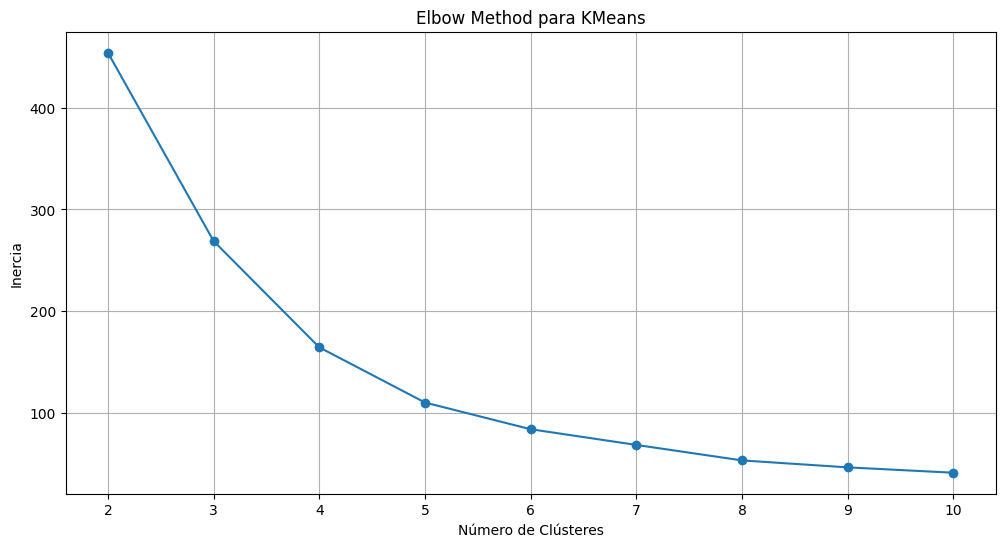

Número óptimo de clústeres según el método del codo: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


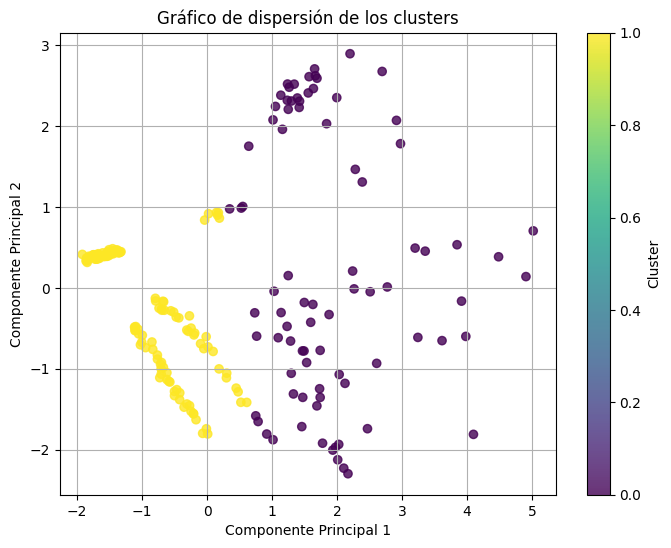

Resultados del clustering K-means con el número óptimo de clústeres:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que 'data_onehot_pca' son tus datos

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_onehot_pca)

# Lista para almacenar los valores de inercia
inertia_values = []

# Rango de número de clústeres a probar (desde 2)
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_onehot_pca)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    print(f"Clusters: {n_clusters}, Inertia: {inertia}")

# Graficar la inercia en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method para KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontrar el número óptimo de clústeres según el método del codo
optimal_index = np.argmin(np.gradient(inertia_values))
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el método del codo: {optimal_clusters}")

# Ejecutar KMeans con el número óptimo de clústeres y mostrar resultados
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(data_onehot_pca)

# Graficar el resultado del clustering con el número óptimo de clústeres
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optimal, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Imprimir los resultados del clustering con el número óptimo de clústeres
print("Resultados del clustering K-means con el número óptimo de clústeres:")
print(labels_optimal)


En este caso, como se puede observar en la gráfica, si tenemos en cuenta primeramente la separación entre clusters, la realidad es que no existe una gran dispersión, lo que nos indica que quizás no hay una gran diferenciación entre patrones, lo que complica el análisis de datos.
Sin embargo, a la hora de valorar la representación de los datos del mismo cluster, es cierto que no sería el peor método de clustering, sin embargo, se siguen encontrando ciertas subpoblaciones dentro del mismo cluster lo que dificulta el proceso.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 2, Inertia: 1176.8185838284403
Clusters: 3, Inertia: 427.4887919926185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 4, Inertia: 175.91704016321208
Clusters: 5, Inertia: 134.38803224026506


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 6, Inertia: 101.43379659850247


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 7, Inertia: 80.73163962085863
Clusters: 8, Inertia: 59.41623007141356


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters: 9, Inertia: 48.6309397841551
Clusters: 10, Inertia: 38.29148955295323


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


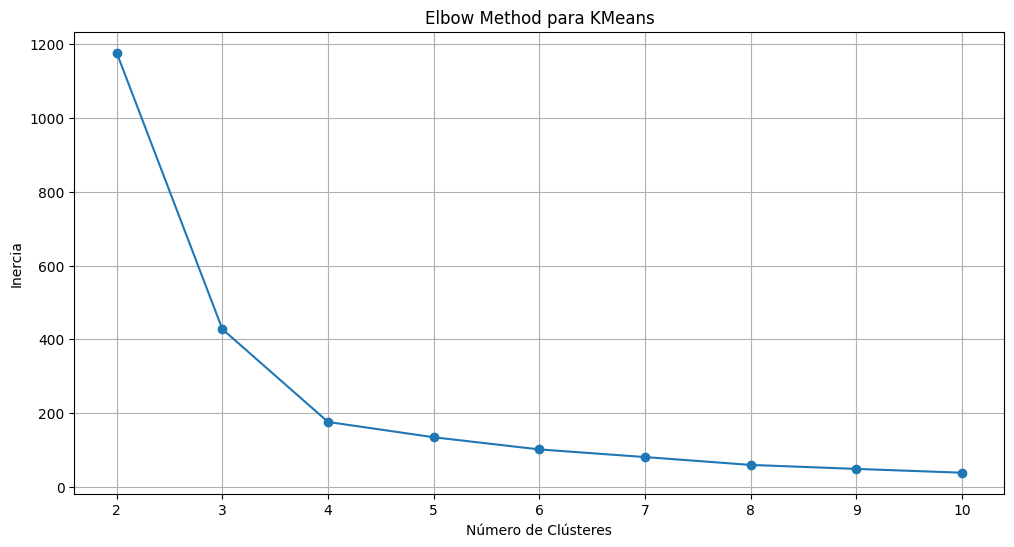

Número óptimo de clústeres según el método del codo: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


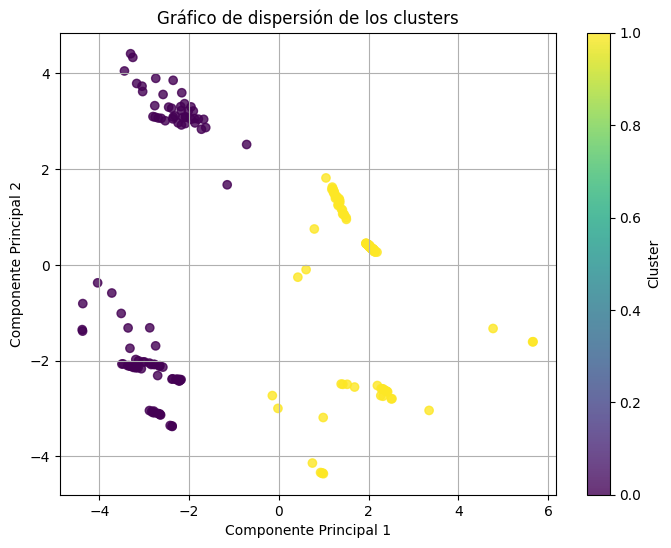

Resultados del clustering K-means con el número óptimo de clústeres:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]


In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que 'data_ordinal_pca' son tus datos

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_ordinal_pca)

# Lista para almacenar los valores de inercia
inertia_values = []

# Rango de número de clústeres a probar (desde 2)
n_clusters_range = range(2, 11)  # Probamos desde 2 hasta 10 clústeres

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_ordinal_pca)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    print(f"Clusters: {n_clusters}, Inertia: {inertia}")

# Graficar la inercia en función del número de clústeres
plt.figure(figsize=(12, 6))
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.title('Elbow Method para KMeans')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.xticks(n_clusters_range)
plt.grid(True)
plt.show()

# Encontrar el número óptimo de clústeres según el método del codo
optimal_index = np.argmin(np.gradient(inertia_values))
optimal_clusters = n_clusters_range[optimal_index]
print(f"Número óptimo de clústeres según el método del codo: {optimal_clusters}")

# Ejecutar KMeans con el número óptimo de clústeres y mostrar resultados
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(data_ordinal_pca)

# Graficar el resultado del clustering con el número óptimo de clústeres
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels_optimal, cmap='viridis', alpha=0.8)
plt.title('Gráfico de dispersión de los clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Imprimir los resultados del clustering con el número óptimo de clústeres
print("Resultados del clustering K-means con el número óptimo de clústeres:")
print(labels_optimal)


En este caso, si lo comparamos con el caso anterior, lo cierto es que teniendo en cuenta la dispersión entre clusters, se podría decir que se mejora en este aspecto. Además, en cuanto a la representación de los datos dentro del mismo cluster, se ha mejorado en términos de dispersión, ya que ciertos clusters que tenían una gran diferenciación entre datos y que contaban con algunas subpoblaciones, ahora no las tienen.

**EJERCICIO 4: DISCUSIÓN DE LOS RESULTADOS**

Ahora llega el momento de sacar conclusiones después de haber aplicado hasta tres métodos diferentes de clustering sobre nuestro conjunto de datos.
En cada uno de los algoritmos que hemos utilizado (KMeans, Hierarchical Clustering, DBScan), se ha probado con los dos tipos de codificaciones que hemos estado utilizando durante el proyecto para las variables categóricas, One-hot Encoding y Ordinal Variable Encoding.
Después de analizar los resultados con las representaciones gráficas que hemos realizado, en concreto, con los gráficos de dispersión, hemos podido observar que, por lo general, codificando las variables categóricas como variables ordinales obtenemos mejores resultados, ya que hay mayor separación entre clusters, lo que indica que se han diferenciado mejor los patrones. Además, dentro de los propios clusters suelen haber menos subpoblaciones, ya que los datos se muestran mucho más concentrados, facilitando mucho el proceso de análisis de datos.

**EJERCICIO 5: PIPELINE DE CLUSTERING RECOMENDADO**



In [20]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

def load_data(file_path):
    return pd.read_csv(file_path)

def preprocess_data(data):
    # Mapeo de colores
    mapping = {
        'Red' : ['Red'],
        'Orange-Red': ['Orange-Red'],
        'Orange': ['Orange'],
        'Yellow-Orange': ['Pale yellow orange'],
        'Yellow': ['Yellowish White', 'yellow-white', 'White-Yellow'],
        'White': ['White', 'Whitish', 'white'],
        'Blue-White': ['Blue White', 'Blue white', 'Blue-white', 'Blue-White'],
        'Blue': ['Blue'],
    }
    for target_color, source_colors in mapping.items():
        data.loc[data['Color'].isin(source_colors), 'Color'] = target_color

    return data

def create_pipeline():
    # Definir las columnas categóricas y numéricas
    categorical_columns = ['Color', 'Spectral_Class']  # Ajusta esto según tus datos
    numeric_columns = ['Temperature', 'L', 'R', 'A_M']  # Ajusta esto según tus datos

    # Definir preprocesamiento para columnas categóricas
    categorical_transformer = Pipeline(steps=[
        ('ordinal_encoder', OrdinalEncoder())
    ])

    # Definir preprocesamiento para columnas numéricas
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Combinar preprocesamientos
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_columns),
            ('num', numeric_transformer, numeric_columns)
        ])

    # Definir el pipeline completo
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=2)),
        ('clustering', AgglomerativeClustering())  # Ajusta los parámetros según tus necesidades
    ])

    return pipeline

# Cargar datos
data = load_data("stars_data.csv")

# Preprocesar datos
data = preprocess_data(data)

# Crear pipeline
pipeline = create_pipeline()

# Entrenar pipeline
pipeline.fit(data)

# Usar el pipeline para predecir o transformar nuevos datos si es necesario


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Color', 'Spectral_Class']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'L', 'R',
                                                   'A_M'])])),
                ('pca', PCA(n_components=2)),
                ('clustering', AgglomerativeClustering())])

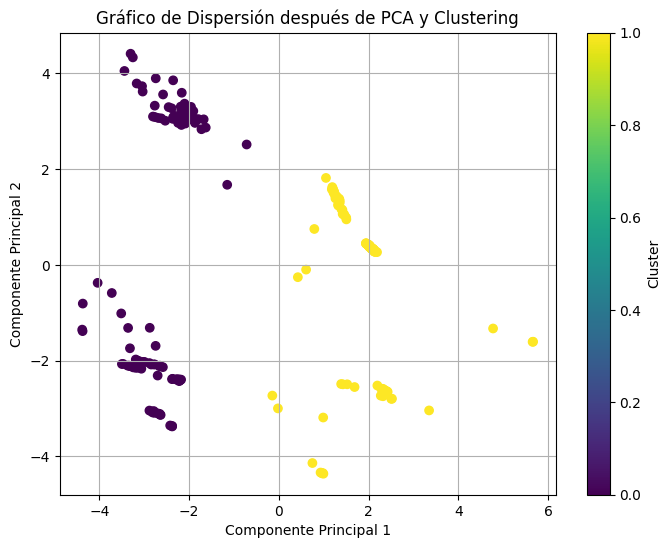

In [21]:
import matplotlib.pyplot as plt

# Obtener las coordenadas PCA de los datos
data_pca = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocessor'].transform(data))

# Obtener las etiquetas de los clusters
cluster_labels = pipeline.named_steps['clustering'].labels_

# Graficar los resultados en una gráfica de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Gráfico de Dispersión después de PCA y Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
